## Modeling Section


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import random
import os
#load python packages

import datetime
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, metrics

In [75]:
df = pd.read_csv('BigMartModelData.csv')
pd.options.display.max_columns = None

In [76]:
X_drop = df.drop(['Delivery_Coded', 'Category_Name', 'Customer_State', 'Customer_Zipcode','Order_City','Order_Country','Order_State','Order_Status'], axis = 1)
X_dev = pd.get_dummies(X_drop, columns = ['Delivery_Status', 'Shipping_Mode'])
# One-hot encode all features in training set.
#X = pd.get_dummies(X_dev)

X_dev

,Unnamed: 0,Actual_Ship_Days,Scheduled_Days_Ship,Late_delivery_risk,Category_Id,Order_Region_Caribbean,Order_Region_Central Africa,Order_Region_Central America,Order_Region_Central Asia,Order_Region_East Africa,Order_Region_East of USA,Order_Region_Eastern Asia,Order_Region_Eastern Europe,Order_Region_North Africa,Order_Region_Northern Europe,Order_Region_Oceania,Order_Region_South America,Order_Region_South Asia,Order_Region_South of USA,Order_Region_Southeast Asia,Order_Region_Southern Africa,Order_Region_Southern Europe,Order_Region_US Center,Order_Region_West Africa,Order_Region_West Asia,Order_Region_West of USA,Order_Region_Western Europe,Delivery_Status_Advance shipping,Delivery_Status_Late delivery,Delivery_Status_Shipping on time,Shipping_Mode_First Class,Shipping_Mode_Same Day,Shipping_Mode_Second Class,Shipping_Mode_Standard Class
0,0,3,4,0,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,3,3,4,0,73,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,6,2,1,1,73,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,13,2,1,1,73,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,15,2,1,1,73,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59486,180500,3,4,0,45,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
59487,180505,2,4,0,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
59488,180508,4,2,1,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
59489,180512,6,4,1,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [77]:
# Split the data
y = df['Delivery_Coded'].values.tolist()


X = X_dev.values.tolist()

features = ['Category_Name', 'Customer_State',
       'Customer_Zipcode', 'Order_City', 'Order_Country', 'Order_State',
       'Shipping_Mode', 'Order_Status','Delivery_Status','Delivery_Coded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



In [78]:
class_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)

In [79]:
class_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

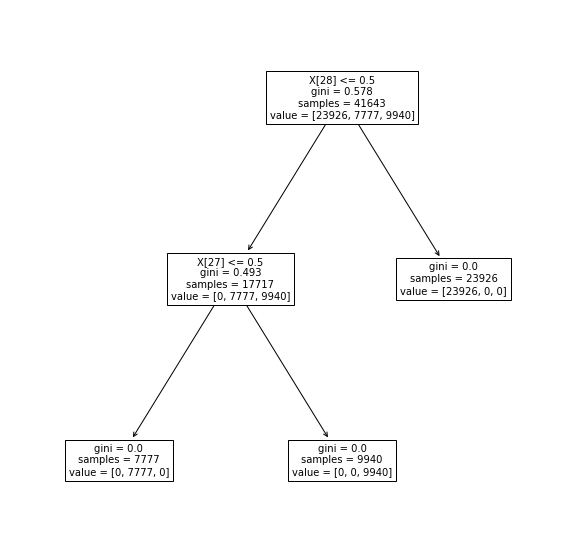

In [80]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(class_tree, fontsize=10)
plt.show()

In [81]:
# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = class_tree.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
pd.Series(y_pred)

0        2
1        0
2        2
3        2
4        0
        ..
17843    0
17844    0
17845    0
17846    1
17847    0
Length: 17848, dtype: int32

In [82]:
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, average = 'macro'))
#print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, average = 'macro'))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, average = 'macro'))
#print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, average = 'macro'))

Model Entropy - no max depth
Accuracy: 1.0
Balanced accuracy: 1.0
Precision score for "Yes" 1.0
Recall score for "Yes" 1.0


## RandomForest Setup

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
# Plug in appropriate max_depth and random_state parameters 
firstRFModel = RandomForestClassifier(random_state = 1234, max_depth = 3)

# Model and fit
firstRFModel.fit(X_train, y_train)

y_pred = firstRFModel.predict(X_test)

pd.Series(y_pred)